In [1]:
import matplotlib.pyplot as plt
from mpi4py import MPI
import numpy as np
import tracemalloc
import os

In [2]:
%%writefile pictures.py
import matplotlib.pyplot as plt
from mpi4py import MPI
import numpy as np
import imageio
from copy import deepcopy


comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

def pic(M,name):
    fig, ax = plt.subplots()
    ax.imshow(M)
    ax.axis('off')
    #fig.savefig(name) #uncomment to create pictures
    plt.close(fig);
   
img = plt.imread(r'C:\Users\ivang\Desktop\123.jpg')   

M = deepcopy(img)
files = list()
shp = np.shape(img)

x,y = divmod(shp[0],size)

M = np.roll(M,rank*x,axis = 0)


for i in range(rank*x,(rank+1)*x):
    pic(M,f'{i+100}animation.png')
    files.append(f'{i+100}animation.png')
    M = np.roll(M,1,axis = 0)


if (y != 0):
    if rank == 0:
        M = deepcopy(img)
        M = np.roll(M,size*x, axis=0)
        for i in range(shp[0]-y,shp[0]):
            pic(M,f'{i+100}animation.png')
            files.append(f'{i+100}animation.png')
            M = np.roll(M,1,axis = 0)

 
data = comm.gather(files)

if rank == 0:
    files = list()
    for i in range(len(data)):
        files = np.concatenate((files,data[i]))
    files = np.sort(files)
    
    #uncomment the lines below to create gif
    #images = list()
    #for file in files:
        #images.append(imageio.imread(file))
    #imageio.mimsave(f'3.gif', images, fps = 60)
    print("all done");

Overwriting pictures.py


In [62]:
!mpiexec -np 3 python pictures.py

all done


C:\Users\ivang\Desktop\skoltech_courses\HPPL\pictures.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))


all done


C:\Users\ivang\Desktop\skoltech_courses\HPPL\pictures.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))


In [4]:
files = [file for file in os.listdir(os.getcwd()) if file.endswith('.png')]

In [5]:
for file in files:
    os.remove(file)

In [3]:
n = np.arange(1,6)
results = list()

for i in n:
    a = %timeit -o -r 3 !mpiexec -np {i} python pictures.py
    results.append(a.best)

all done
all done
all done
all done
12.6 s ± 306 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
all done
all done
all done
all done
10.1 s ± 290 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
all done
all done
all done
all done
8.16 s ± 277 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
all done
all done
all done
all done
8.49 s ± 313 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
all done
all done
all done
all done
9.83 s ± 210 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


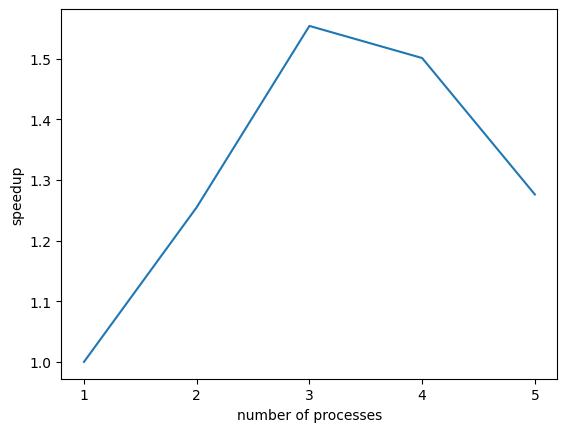

In [4]:
res = list(map(lambda x: results[0]/x, results))
plt.plot(n,res)
plt.xlabel("number of processes")
plt.xticks([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
plt.ylabel("speedup");

In [18]:
tmp = list()
n = np.arange(1,6)
for i in n:
    tracemalloc.start()
    !mpiexec -np {i} python pictures.py
    tmp.append(tracemalloc.get_traced_memory()[0])
    tracemalloc.stop()

all done
all done
all done
all done
all done


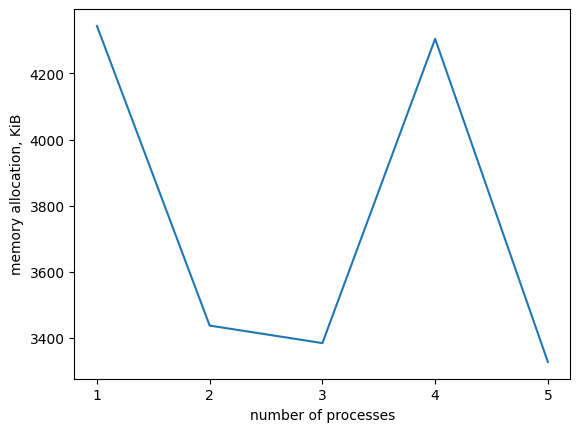

In [20]:
plt.plot(n,tmp)
plt.xlabel("number of processes")
plt.xticks([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
plt.ylabel("memory allocation, KiB");